In [3]:
!pip install ggplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from ggplot import *

    100% |████████████████████████████████| 2.2MB 203kB/s ta 0:00:011
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
dataset = pd.read_csv('data/Series3_6.15.17_padel.csv')
dataset.dropna(axis=0, how='any',inplace=True)
dataset.reset_index(drop=True, inplace=True)
target= dataset.IC50
descriptors = dataset.drop('IC50', axis = 1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in descriptors:
    if descriptors[column].dtype == object:
        descriptors[column] = le.fit_transform(descriptors[column])
else:
    pass
x_scalar = StandardScaler()
y_scalar = StandardScaler()

X = x_scalar.fit_transform(descriptors)
y= target.values.reshape(-1,1)
dataset['label'] = target

###### PCA for dimensionality reduction

In [5]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X)

dataset['pca-one'] = pca_result[:,0]
dataset['pca-two'] = pca_result[:,1] 

print(pca.explained_variance_ratio_)

[0.39346879 0.10866365 0.06581709 0.06054051 0.04598866 0.03853489]


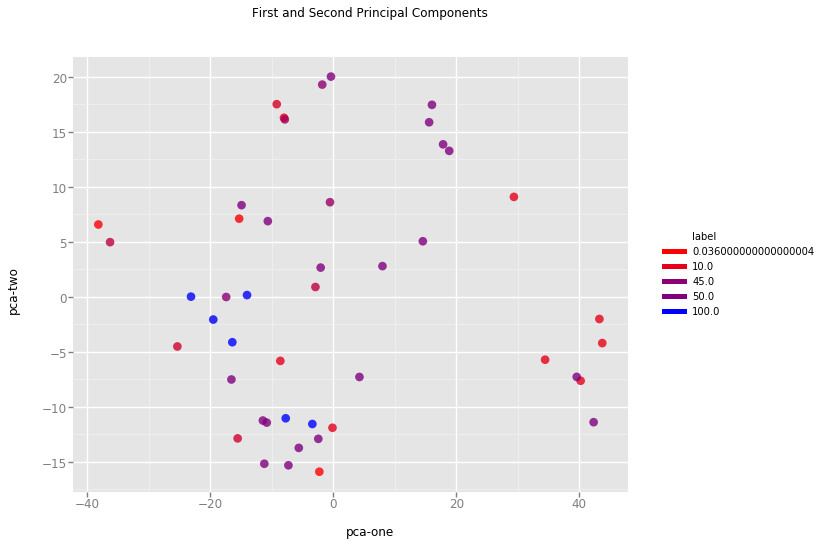

<ggplot: (-9223363300900819007)>

In [6]:
chart = ggplot( dataset, aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("First and Second Principal Components")
chart

###### Skree plot

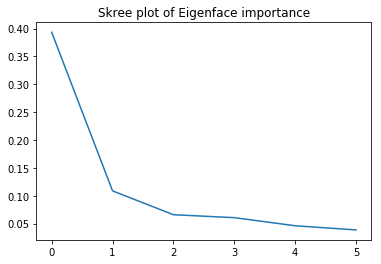

In [7]:
pd.Series(pca.explained_variance_ratio_).plot()
plt.title("Skree plot of Eigenface importance")
plt.show()

###### T-SNE implementation for dimensionality reduction

In [8]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=1000)
tsne_results = tsne.fit_transform(X)


[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.001s...
[t-SNE] Computed neighbors for 46 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 11.161075
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.914379
[t-SNE] Error after 1000 iterations: 0.501738


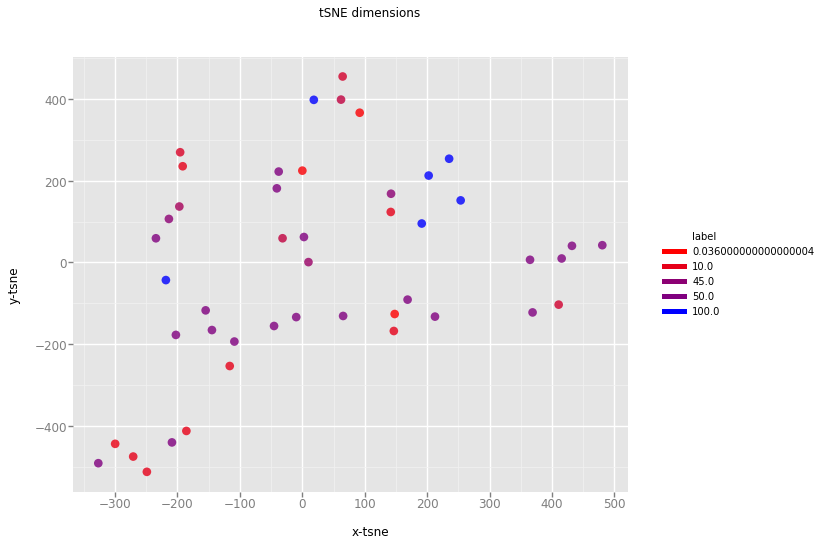

<ggplot: (8735945640491)>

In [23]:
dataset['x-tsne'] = tsne_results[:,0]
dataset['y-tsne'] = tsne_results[:,1]

chart = ggplot( dataset, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("tSNE dimensions")
chart

###### T-Sne implementation on PCA reduced data

In [11]:
pca_50 = PCA(n_components=40)
pca_result_50 = pca_50.fit_transform(X)
print(np.sum(pca_50.explained_variance_ratio_))

0.9977996577676258


In [35]:
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1100,random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_50)


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 7.578436
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.606842
[t-SNE] Error after 1100 iterations: 1.002470


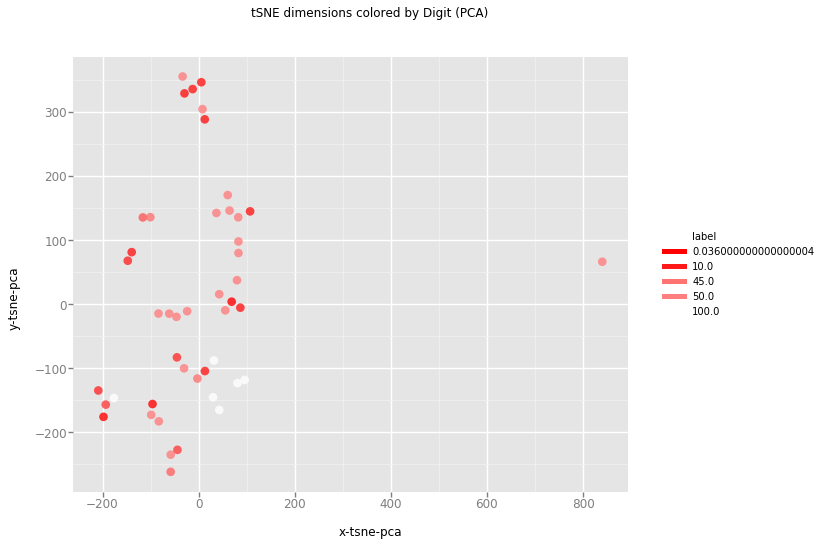

<ggplot: (8735945169910)>

In [34]:
dataset['x-tsne-pca'] = tsne_pca_results[:,0]
dataset['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( dataset, aes(x='x-tsne-pca', y='y-tsne-pca', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'white') \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart